In [1]:
import pandas as pd
import numpy as np
import string
from nltk.corpus import stopwords

In [2]:
df = pd.read_csv('spam.txt',encoding='utf-8')

In [3]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
# Data Cleaning
# EDA
# Text Pre-processing
# Model building
# Evaluation
# Improvement
# Website
# Deploy

# Data Cleaning


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


### Dropping last 3 Columns due to the count of null values

In [6]:
df.drop(columns = ['Unnamed: 2','Unnamed: 3','Unnamed: 4'], inplace = True)

In [7]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


## Renaming the columns

In [8]:
df.rename(columns = {'v1':'target', 'v2':'text'}, inplace = True)
df.head()

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [9]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [10]:
df['target'] = encoder.fit_transform(df['target'])

In [11]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


## Missing values check:

In [12]:
df.isnull().sum()

target    0
text      0
dtype: int64

## Check for duplicate values

In [13]:
df.duplicated().sum()

403

In [14]:
# Removing dupicate values
df.drop_duplicates(keep = 'first',inplace = True)
df.duplicated().sum()

0

# Exploratory Data Analysis

In [15]:
import matplotlib.pyplot as plt

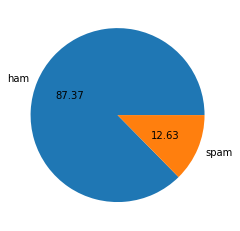

In [16]:
plt.pie(df['target'].value_counts(), labels = ['ham', 'spam'], autopct='%.2f')
plt.show()

### Checking the number of number of sentences, characters and words and analysing them

In [17]:
import nltk

In [18]:
# adding a column for number of characters
df['num_characters'] = df['text'].apply(len)

In [19]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [20]:
# adding a column for number of words
df['num_words'] = df['text'].apply(lambda x: len(nltk.word_tokenize(x)))

In [21]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [22]:
# adding a column for number of sentences
df['num_sentences'] = df['text'].apply(lambda x: len(nltk.sent_tokenize(x)))

In [23]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [24]:
df[['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.923776,18.456375,1.962275
std,58.174846,13.323322,1.433892
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [25]:
# analysing the text which are not spam

df[df['target'] == 0][['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.456820,17.123339,1.815545
std,56.356802,13.491315,1.364098
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [26]:
# analysing the rows which are spam

df[df['target'] == 1][['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.479326,27.675345,2.977029
std,30.014336,7.011513,1.493676
min,13.000000,2.000000,1.000000
25%,131.000000,25.000000,2.000000
50%,148.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,223.000000,46.000000,9.000000


In [27]:
import seaborn as sns

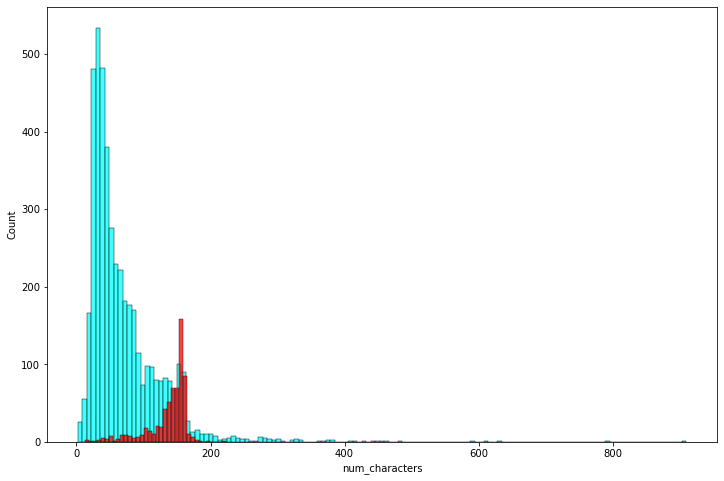

In [28]:
plt.figure(figsize = (12, 8))
sns.histplot(df[df['target'] == 0]['num_characters'],color = '#00ffff')
sns.histplot(df[df['target']==1]['num_characters'], color = 'red')
plt.show()

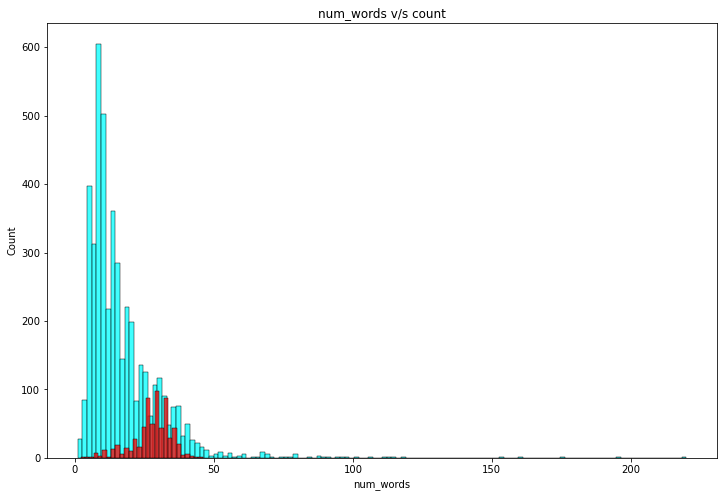

In [29]:
plt.figure(figsize = (12, 8))
sns.histplot(df[df['target'] == 0]['num_words'],color = '#00ffff')
sns.histplot(df[df['target']==1]['num_words'], color = 'red')
plt.title('num_words v/s count')
plt.show()

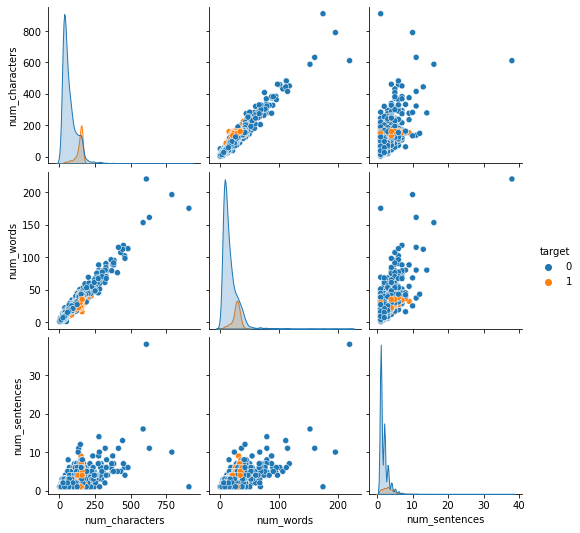

In [30]:
sns.pairplot(df, hue = 'target')
plt.show()

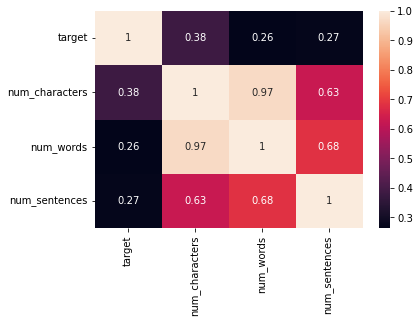

In [31]:
# finding the correlation wrt each column

sns.heatmap(df.corr(), annot = True)

plt.show()

# Text Preprocessing
####     1. Lower case
####     2. Tokenisation
####     3. Removing special words
####     4. Removing stop words and punctuations
####     5. Stemming

In [32]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [33]:
def transform_text(text):
    
    y = []
    
    '''
    Converting the text into lower case
    '''
    text = text.lower()
    
       
    '''
    Removing punctuations from text
    '''
    text = text.translate(str.maketrans('','',string.punctuation))
    
    
    '''
    Word tokenizing the text, so that we can apply future text-preprocessing steps
    '''
    text = nltk.word_tokenize(text) # here text is converted into a list because word_tokinze returns a list
    
    
    '''
    Checking for special characters
    '''
    for i in text:
        if i.isalnum():
            y.append(i)
    
    text = y[:]
    y.clear()
    
    
    '''
    Removing the stopwords
    '''
    for i in text:
        if i not in stopwords.words('english'):
            y.append(i)
        
    text = y[:]
    y.clear()
    
    
    '''
    Applying stemming on each and every word of text
    '''
    for i in text:
        y.append(ps.stem(i))
    
    
    return ' '.join(y)
    

In [34]:
df['transformed_text'] = df['text'].apply(transform_text)

In [35]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah dont think goe usf live around though


In [37]:
from wordcloud import WordCloud

In [38]:
wc = WordCloud(width = 500, height= 500, min_font_size = 10, background_color = 'white')

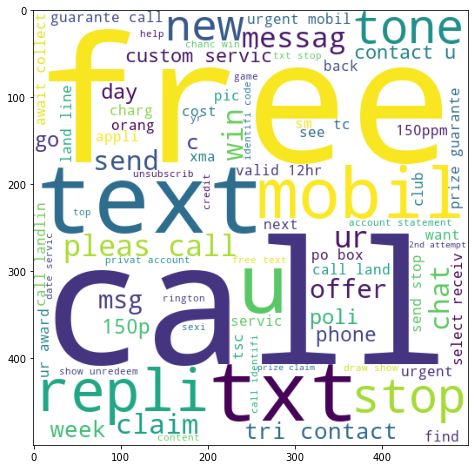

In [44]:
spam_wc = wc.generate(df[df['target']==1]['transformed_text'].str.cat(sep = ' '))

# plotting the image as the generate function returns image
plt.figure(figsize = (10,8))
plt.imshow(spam_wc)
plt.show()

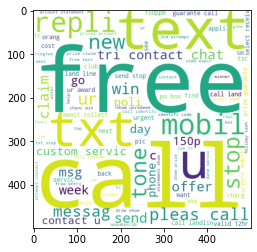

In [41]:
ham_wc = wc.generate(df[df['target']==0]['transformed_text'].str.cat(sep = ' '))

# plotting the image as the generate function returns image
plt.figure(figsize = (10,8))
plt.imshow(spam_wc)
plt.show()